[(0, 47.0, 20.18, 19.7, 21.97) (0, 48.0, 20.18, 19.7, 21.97)
 (0, 46.0, 20.16, 19.56, 21.97) (0, 46.0, 20.16, 19.56, 21.97)
 (0, 48.0, 20.12, 20.08, 21.97) (0, 47.0, 20.12, 20.08, 21.97)
 (0, 50.0, 20.12, 19.78, 21.97) (0, 48.0, 20.02, 19.78, 21.97)
 (0, 48.0, 20.02, 19.78, 21.97) (0, 46.0, 20.08, 20.06, 21.97)]


/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


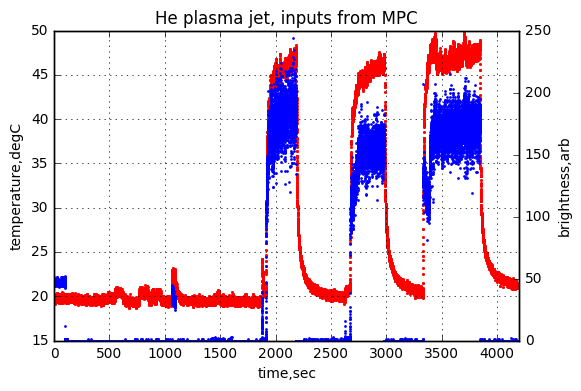

In [8]:
%matplotlib inline

import numpy
from matplotlib import pyplot
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", module="numpy")

fname = '/mnt/storage/data/2016-11-17_10:34:01/in/temperature/temperaturehistory'
col_names = ('dt','ms','ctrl',
             'bright','set','ctrl_output',
             'intensity','ttube','tsurf',
             'setv','setf','setq',
             'outv','outf','outq',
             'measv','measf','measq',
             'tamb')
col_dtypes = (datetime,int,bool,
              float,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float)

convertfunc = lambda s: float(s)*(1./1000.)

data = numpy.genfromtxt(fname,delimiter=',',max_rows=68000,usecols=(1,6,7,8,18),
                        dtype=col_dtypes,names=col_names,invalid_raise=False,
                        converters = {'ms': convertfunc})

print(data[:10])

fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['tsurf'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='temperature')

ax2 = ax.twinx()
ax2.plot(data['ms'],data['intensity'],color='blue',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

#ax2.plot(data['ms'],data['ctrl_output'],color='green',
#        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='ctrl_out')


ax.set_xlim([0,4200])
#ax.set_ylim([0,30])
ax.grid()
#ax.legend()
ax.set_ylabel('temperature,degC')
ax2.set_ylabel('brightness,arb')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, inputs from MPC')

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()

/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


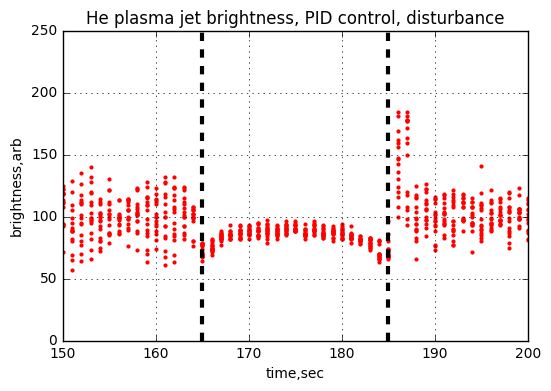

In [63]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['brightness'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='brightness')
#ax.plot(data['ms'],data['set'],color='blue',
#        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='setpoint')
#ax2 = ax.twinx()
#ax2.plot(data['ms'],data['ctrl_output'],color='green',
#        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='ctrl_out')

ax.set_xlim([150,200])
#ax.set_xlim([50000,200000])
ax.grid()
#ax.legend()
ax.set_ylabel('brightness,arb')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet brightness, PID control, disturbance')

ax.axvline(165,0,250,color='black', linewidth=3, linestyle='--')
ax.axvline(185,0,250,color='black', linewidth=3, linestyle='--')

fig.show()

/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


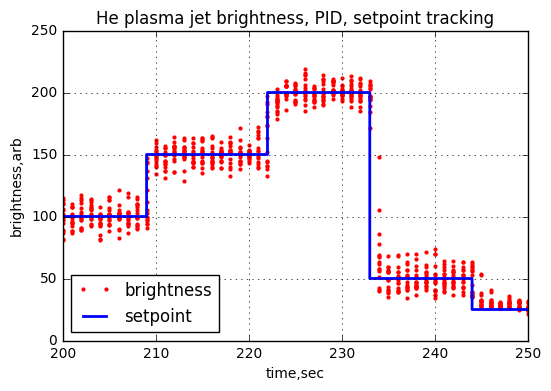

In [70]:
%matplotlib inline

import numpy
from matplotlib import pyplot
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", module="numpy")

fname = 'data_brightness_02.csv'
col_names = ('dt','ms','brightness','set','ctrl_output')
col_dtypes = (datetime,int,float,float,float)

convertfunc = lambda s: float(s)*(1./1000.)

data = numpy.genfromtxt(fname,delimiter=',',usecols=(1,2,3,4),max_rows=4200,
                        dtype=col_dtypes,names=col_names,invalid_raise=False,
                        converters = {'ms': convertfunc})

fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['brightness'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='brightness')
ax.plot(data['ms'],data['set'],color='blue',
        linestyle='-',label='setpoint',linewidth=2)
#ax2 = ax.twinx()
#ax2.plot(data['ms'],data['ctrl_output'],color='green',
#        linestyle='None',marker='o',markeredgewidth=0,markersize=3,label='ctrl_out')

ax.set_xlim([200,250])
#ax.set_xlim([50000,200000])
ax.grid()
ax.legend(loc=3)
ax.set_ylabel('brightness,arb')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet brightness, PID, setpoint tracking')

ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()